In [64]:
import json
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [74]:
log_p_results = []
detect_results = []
ensemble_results = []
for folder in os.listdir("results/Ensemble"):
    if ".DS_Store" not in folder:
        for subf in os.listdir(os.path.join("results/Ensemble", folder)):
            if subf != ".DS_Store":
                path = os.path.join("results/Ensemble", folder, subf)
                with open(os.path.join(path, "args.json"), "rb") as args_j:
                    args = json.load(args_j)
                # with open(os.path.join(path, "likelihood_threshold_results.json"), "rb") as l_j:
                #     log_p_results.append((args, json.load(l_j)))
                with open(os.path.join(path,"perturbation_50_z_results.json"), "rb") as d_j:
                    detect_results.append((args, json.load(d_j)))
                with open(os.path.join(path,"perturbation__ensemble_50_z_results.json"), "rb") as d_j:
                    ensemble_results.append((args, json.load(d_j)))
    


In [128]:
detect_results[0][1]["metrics"].keys()

dict_keys(['roc_auc', 'fpr', 'tpr'])

In [117]:
ensemble_results[0][1]["metrics"]["roc_auc"]

0.246025

In [118]:
ensemble_results_dict = {
    "xsum" : {},
    "squad" : {},
    "writing" : {}
}

for results in ensemble_results:
    args = results[0]
    stats = results[1]
    
    dataset, model = args["dataset"], args["base_model_name"]
    ensemble_results_dict[dataset][model] = {
        "f1_metrics" : stats["f1_metrics"],
        "accuracy" : stats["accuracy"],
        "confusion_matrix" :  stats["confusion_matrix"],
        "metrics" : stats["metrics"]
    }

In [122]:
for key, value in ensemble_results_dict.items():
    per_dataset_result = 0
    for m in ["gpt2-xl", "EleutherAI/gpt-neo-2.7B", "EleutherAI/gpt-j-6B", "EleutherAI/gpt-neox-20b"]:
        per_dataset_result += value[m]["accuracy"]
        print("{:.2f}".format(value[m]["accuracy"]), end=" & ")
    print("{:.2f}".format(per_dataset_result/4), end=" & ")

0.50 & 0.50 & 0.51 & 0.51 & 0.50 & 0.48 & 0.49 & 0.50 & 0.51 & 0.49 & 0.50 & 0.51 & 0.53 & 0.52 & 0.51 & 

In [47]:
log_p_results_dict = {
    "xsum" : {},
    "squad" : {},
    "writing" : {}
}

for results in log_p_results:
    args = results[0]
    stats = results[1]
    
    dataset, model = args["dataset"], args["base_model_name"]
    log_p_results_dict[dataset][model] = {
        "f1_metrics" : stats["f1_metrics"],
        "accuracy" : stats["accuracy"],
        "confusion_matrix" :  stats["confusion_matrix"],
        "metrics" : stats["metrics"]
    }

In [59]:
for key, value in results_dict.items():
    per_dataset_result = 0
    for m in ["gpt2-xl", "EleutherAI/gpt-neo-2.7B", "EleutherAI/gpt-j-6B", "EleutherAI/gpt-neox-20b"]:
        per_dataset_result += value[m]["accuracy"]
        print("{:.2f}".format(value[m]["accuracy"]), end=" & ")
    print("{:.2f}".format(per_dataset_result/4), end=" & ")

0.53 & 0.56 & 0.53 & 0.51 & 0.54 & 0.65 & 0.56 & 0.53 & 0.51 & 0.56 & 0.72 & 0.61 & 0.65 & 0.58 & 0.64 & 

In [60]:
detect_results_dict = {
    "xsum" : {},
    "squad" : {},
    "writing" : {}
}

for results in detect_results:
    args = results[0]
    stats = results[1]
    
    dataset, model = args["dataset"], args["base_model_name"]
    detect_results_dict[dataset][model] = {
        "f1_metrics" : stats["f1_metrics"],
        "accuracy" : stats["accuracy"],
        "confusion_matrix" :  stats["confusion_matrix"],
        "metrics" : stats["metrics"]
    }

In [61]:
for key, value in results_dict.items():
    per_dataset_result = 0
    for m in ["gpt2-xl", "EleutherAI/gpt-neo-2.7B", "EleutherAI/gpt-j-6B", "EleutherAI/gpt-neox-20b"]:
        per_dataset_result += value[m]["accuracy"]
        print("{:.2f}".format(value[m]["accuracy"]), end=" & ")
    print("{:.2f}".format(per_dataset_result/4), end=" & ")
print("\n")
for key, value in detect_results_dict.items():
    per_dataset_result = 0
    for m in ["gpt2-xl", "EleutherAI/gpt-neo-2.7B", "EleutherAI/gpt-j-6B", "EleutherAI/gpt-neox-20b"]:
        per_dataset_result += value[m]["accuracy"]
        print("{:.2f}".format(value[m]["accuracy"]), end=" & ")
    print("{:.2f}".format(per_dataset_result/4), end=" & ")

0.87 & 0.91 & 0.65 & 0.62 & 0.76 & 0.87 & 0.77 & 0.54 & 0.51 & 0.67 & 0.91 & 0.84 & 0.69 & 0.73 & 0.79 & 

In [63]:
print(" & "*14)

 &  &  &  &  &  &  &  &  &  &  &  &  &  & 


In [7]:
import pandas as pd

In [9]:
columns = ["epoch", "gpt2-xl", "gpt-neo", "gpt-j", "neox"]

In [11]:
text = """0	0.582866667	0.576566667	0.562866667	0.556033333
2	0.627820513	0.620858974	0.584358974	0.544824786
4	0.590525641	0.604547009	0.549149573	0.540277778
6	0.554094017	0.57458547	0.53707265	0.540149573
8	0.533747863	0.569175214	0.535076923	0.534286325
10	0.532418803	0.560380342	0.536076923	0.530487179"""

In [41]:
data = []
for line in text.split("\n"):
    temp = []
    for i in line.split():
        temp.append(float(i))
    data.append(temp)

data = pd.DataFrame(data, columns=columns)

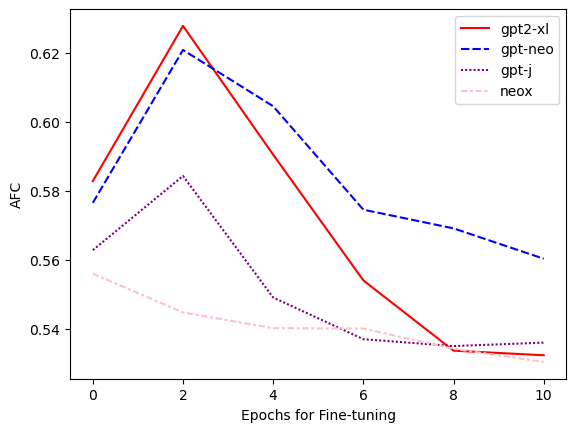

In [68]:
# sns.lineplot(data=data[["gpt2-xl", "gpt-neo", "gpt-j", "neox"]])

ax = sns.lineplot(data=data[["gpt2-xl", "gpt-neo", "gpt-j", "neox"]],
             palette=['red', 'blue', 'purple', 'pink'])

ax.set_xticks(ticks = range(0, 6), labels=range(0,11,2))
ax.set(xlabel='Epochs for Fine-tuning', ylabel='AFC')

plt.savefig("ft-effect.png", dpi=100)

In [67]:
import matplotlib.pyplot as plt